In [36]:
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [95]:
cap = cv2.VideoCapture('imgs/blue_light_flying.mov')
frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frames.append(frame)
    else:
        break

In [99]:
frame = frames[50]
# resize frame to 669 x 669
frame = cv2.resize(frame, (h, w))

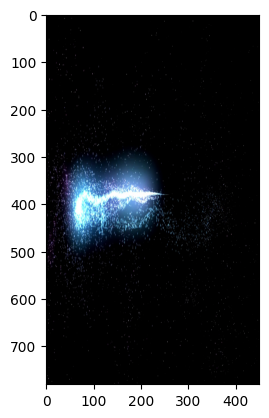

In [97]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

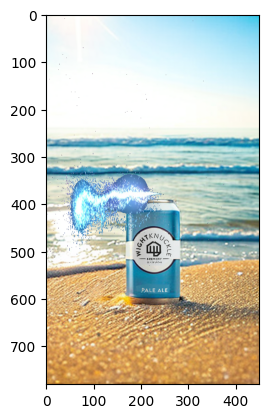

In [103]:
import cv2
import numpy as np

# Load the images
product = img
neon = frame

# The neon image should be a single frame of the animation that you want to add
# Ensure that the images are the same size, if not, you might need to resize
if product.shape != neon.shape:
    neon = cv2.resize(neon, (product.shape[1], product.shape[0]))

# Convert neon image to grayscale
gray = cv2.cvtColor(neon, cv2.COLOR_BGR2GRAY)

# Threshold the neon image to isolate the light
_, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # adjust these values based on your neon image

# Convert mask to 3 channels
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Bitwise and to isolate the neon light
isolated_neon = cv2.bitwise_and(neon, mask)

# Bitwise not operation on the mask to inverse it
inverse_mask = cv2.bitwise_not(mask)

# Bitwise and the inverse mask with the product to create a "hole" for the neon
product_with_hole = cv2.bitwise_and(product, inverse_mask)

# Now add the neon image to the product
final_product = cv2.add(product_with_hole, isolated_neon)

# Show the image
plt.imshow(cv2.cvtColor(final_product, cv2.COLOR_BGR2RGB))


In [25]:
img = cv2.imread('imgs/grid-0008 copy.png')
# 

In [104]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
w, h = img.shape[:2]

outs = []
for i in tqdm(range(len(frames))):
    product = img
    neon = frames[i]

    # The neon image should be a single frame of the animation that you want to add
    # Ensure that the images are the same size, if not, you might need to resize
    if product.shape != neon.shape:
        neon = cv2.resize(neon, (product.shape[1], product.shape[0]))

    # Convert neon image to grayscale
    gray = cv2.cvtColor(neon, cv2.COLOR_BGR2GRAY)

    # Threshold the neon image to isolate the light
    _, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # adjust these values based on your neon image

    # Convert mask to 3 channels
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Bitwise and to isolate the neon light
    isolated_neon = cv2.bitwise_and(neon, mask)

    # Bitwise not operation on the mask to inverse it
    inverse_mask = cv2.bitwise_not(mask)

    # Bitwise and the inverse mask with the product to create a "hole" for the neon
    product_with_hole = cv2.bitwise_and(product, inverse_mask)

    # Now add the neon image to the product
    final_product = cv2.add(product_with_hole, isolated_neon)

    # Show the image
    out = cv2.cvtColor(final_product, cv2.COLOR_BGR2RGB)
    outs.append(out)


100%|██████████| 278/278 [00:01<00:00, 150.64it/s]


In [105]:
# turn outs into a video
imageio.mimsave('outputs/product_blue.mp4', outs, fps=30)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (450, 781) to (464, 784) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7f81de44c000] Warning: data is not aligned! This can lead to a speed loss


In [4]:
import imageio
import numpy as np
from skimage import data, img_as_ubyte
from skimage.transform import swirl
import matplotlib.pyplot as plt
import skimage

# Load the image
image = skimage.io.imread('imgs/grid-0008 copy.png', as_gray=True)

# Create a sequence of images with increasing swirl
images = []
for rotation in np.linspace(0, 2*np.pi, 100):  # Adjust as needed
    swirled = swirl(image, rotation=rotation)
    images.append(img_as_ubyte(swirled))

# Save each frame as an image (optional)

# Create a video from the sequence of images
imageio.mimsave('output.mp4', images, fps=30) 

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (450, 781) to (464, 784) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7fbd5baa0000] Warning: data is not aligned! This can lead to a speed loss
